In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
import numpy as np

In [2]:
# Carregar os dados
df = pd.read_csv("datasets/bd_alunos_evadidos.csv", sep=";")

In [3]:
# Informações sobre as colunas
print("Informações sobre as colunas:")
print(df.dtypes)

print("\nValores ausentes:")
print(df.isnull().sum())

Informações sobre as colunas:
Unnamed: 0                 int64
CODALUNO                   int64
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                      int64
CODTURNOINGRESSO           int64
CODTURNOATUAL              int64
TURNOATUAL                object
CR                       float64
DISCIPLINA                object
NOTADISC                   int64
RESULTDISC                 int64
PERIODODISC                int64
ANOINGRESSO                int64
SEMESTREINGRESSO           int64
ANODESVINCULACAO           int64
SEMESTREDESVINCULACAO      int64
IDADE                      int64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                 int64
CHCURSADA                  int64
ESTADOCIVIL               object
TRANCAMENTOS 


Frequência da variável 'AREACURSO':
Ciências Sociais Aplicadas        2615
Ciências Exatas e da Terra        2420
Ciências Humanas                  1701
Engenharias                       1185
Ciências Biológicas e da Saúde     657
Letras e Artes                     349
Farmácia                           148
Cinema e Audiovisual                69
Name: AREACURSO, dtype: int64


Text(0, 0.5, 'Frequência')

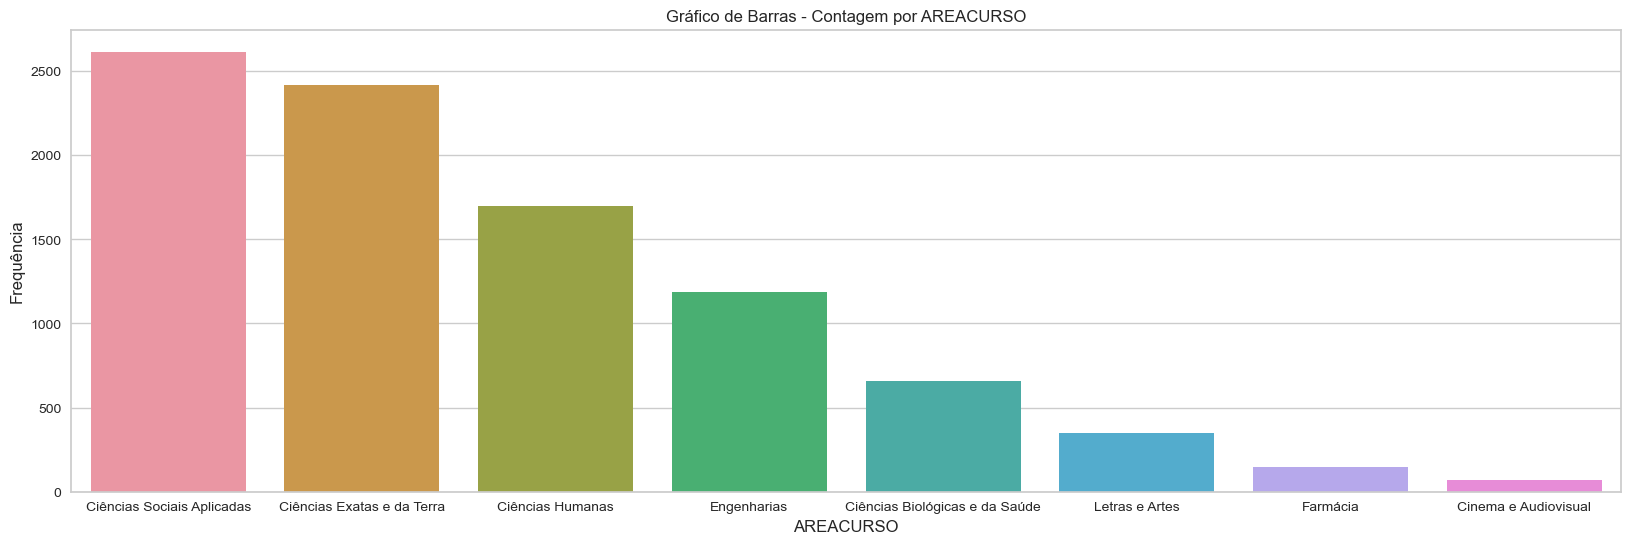

In [4]:
# Exploração das Variáveis Categóricas
plt.figure(figsize=(20, 6))

# Frequência da variável 'AREACURSO'
frequencia_areacurso = df['AREACURSO'].value_counts()
print("\nFrequência da variável 'AREACURSO':")
print(frequencia_areacurso)

# Gráfico de Barras
sns.barplot(x=frequencia_areacurso.index, y=frequencia_areacurso.values)
plt.title('Gráfico de Barras - Contagem por AREACURSO')
plt.xlabel('AREACURSO')
plt.ylabel('Frequência')

Vamos reduzir as categorias a somente a três: Exatas, Humanas e Outras

In [5]:
# Função para agrupar as categorias em "Exatas" ou "Humanas"
def agrupar_categorias(categoria):
    if categoria in ['Ciências Exatas e da Terra', 'Engenharias']:
        return 'Exatas'
    elif categoria in ['Ciências Sociais Aplicadas', 'Ciências Humanas']:
        return 'Humanas'
    else:
        return 'Outras'
    
# Criar uma nova coluna 'Grupo_area_curso'
df['Grupo_area_curso'] = df['AREACURSO'].apply(agrupar_categorias)
contagem_por_grupo_area_curso = df['Grupo_area_curso'].value_counts()
print("\nContagem por grupo 'Grupo_area_curso':")
print(contagem_por_grupo_area_curso)


Contagem por grupo 'Grupo_area_curso':
Humanas    4316
Exatas     3605
Outras     1223
Name: Grupo_area_curso, dtype: int64



Frequência da variável 'ACAOAFIRMATIVA':
AC    7170
A1     531
L2     530
L4     506
L1     227
L3     180
Name: ACAOAFIRMATIVA, dtype: int64


Text(0, 0.5, 'Frequência')

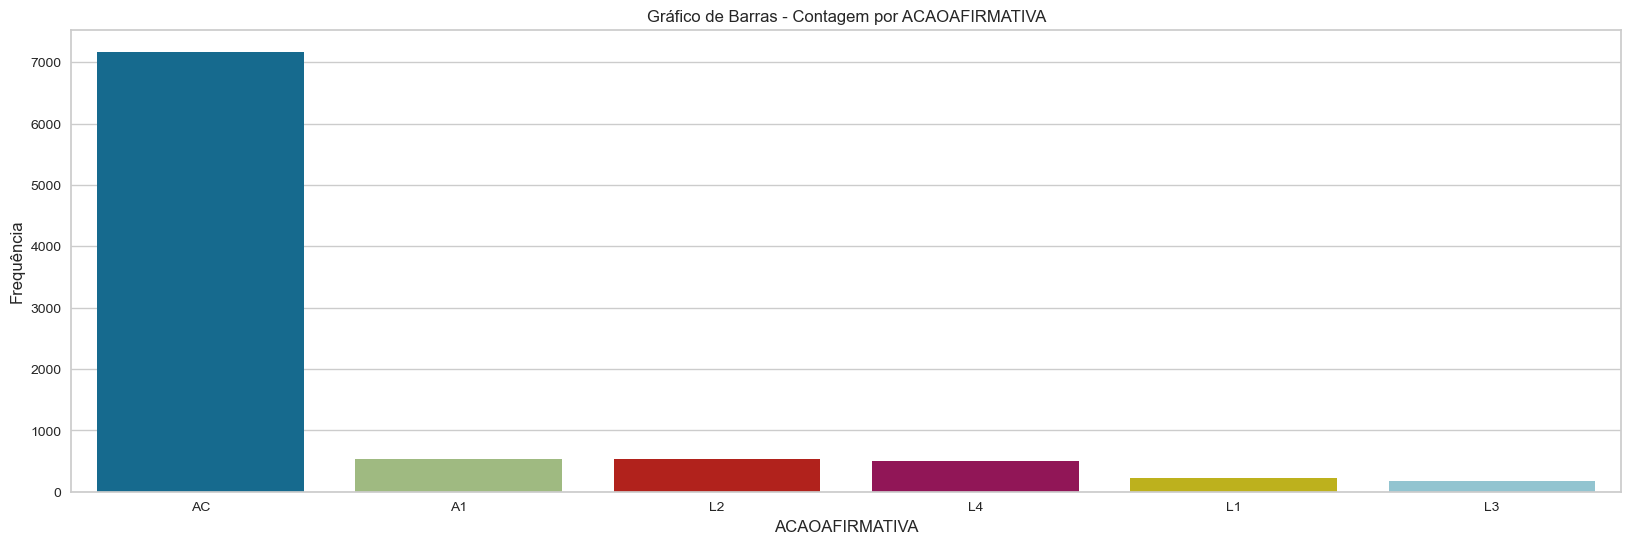

In [7]:
# Frequência da variável 'ACAOAFIRMATIVA'
frequencia_areafirmativa = df['ACAOAFIRMATIVA'].value_counts()
print("\nFrequência da variável 'ACAOAFIRMATIVA':")
print(frequencia_areafirmativa)

# Gráfico de Barras
plt.figure(figsize=(20, 6))
sns.barplot(x=frequencia_areafirmativa.index, y=frequencia_areafirmativa.values)
plt.title('Gráfico de Barras - Contagem por ACAOAFIRMATIVA')
plt.xlabel('ACAOAFIRMATIVA')
plt.ylabel('Frequência')

Vamos reduzir a somente duas categorias: Ampla Concorrência e Ações Afirmativas

In [9]:
# %%
# Função para agrupar as categorias em "Ampla Concorrência" ou "Ações Afirmativas"
def categorias_to_grupo(categoria):
    if categoria in ['AC', 'A0']:
        return 'Ampla Concorrência'
    else:
        return 'Ações Afirmativas'
    
# Criar uma nova coluna 'Grupo_criterio'
df['Grupo_criterio'] = df['ACAOAFIRMATIVA'].apply(categorias_to_grupo)
contagem_por_grupo_criterio = df['Grupo_criterio'].value_counts()
print("\nContagem por grupo 'Grupo_criterio':")
print(contagem_por_grupo_criterio)


Contagem por grupo 'Grupo_criterio':
Ampla Concorrência    7170
Ações Afirmativas     1974
Name: Grupo_criterio, dtype: int64


In [10]:
# Exclusão de Colunas
colunas_excluir = ['CODALUNO', 'STATUSFORMACAO', 'CR', 'CURSO', 'CODTURNOINGRESSO', 'CODTURNOATUAL',
                   'DISCIPLINA', 'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANODESVINCULACAO',
                   'SEMESTREDESVINCULACAO', 'BAIRRO', 'CEP', 'CIDADE', 'CHCURSADA', 'TRANCAMENTOS',
                   'TEMPOPERMANENCIA', 'NOME_CURSO', 'cep_destino', 'MOBILIDADE', 'Unnamed: 0',
                   'DISTANCIA_NUM', 'ACAOAFIRMATIVA', 'AREACURSO', 'TURNOATUAL']

df = df.drop(colunas_excluir, axis=1)

In [11]:
# Codificação One-Hot de Variáveis Categóricas
cat_features = ['Grupo_criterio', 'SEMESTREINGRESSO', 'COR', 'ESTADOCIVIL', 'SEXO', 'Grupo_area_curso']
df[cat_features] = df[cat_features].astype(str)
onehot = OneHotEncoder(variables=cat_features)
X_transform = onehot.fit_transform(df)
X_transform

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,ANOINGRESSO,IDADE,Grupo_criterio_Ampla Concorrência,Grupo_criterio_Ações Afirmativas,SEMESTREINGRESSO_1,...,COR_NEGRA,COR_INDÍGENA,COR_AMARELA,ESTADOCIVIL_SOLTEIRO,ESTADOCIVIL_CASADO,SEXO_M,SEXO_F,Grupo_area_curso_Humanas,Grupo_area_curso_Outras,Grupo_area_curso_Exatas
0,485.0,593.3,521.5,633.1,840.0,2012,42,1,0,1,...,0,0,0,1,0,1,0,1,0,0
1,632.1,653.4,564.2,662.4,640.0,2012,39,1,0,1,...,0,0,0,1,0,0,1,1,0,0
2,597.9,608.3,583.3,703.2,660.0,2012,23,1,0,1,...,0,0,0,1,0,0,1,1,0,0
3,598.7,555.8,565.9,612.3,700.0,2012,25,1,0,1,...,0,0,0,1,0,1,0,1,0,0
4,635.4,613.4,575.3,679.9,500.0,2012,37,1,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,540.8,558.0,574.4,610.8,620.0,2014,24,1,0,0,...,0,0,0,1,0,1,0,1,0,0
9140,527.2,539.0,438.4,551.1,480.0,2014,36,1,0,0,...,0,0,0,1,0,1,0,1,0,0
9141,541.6,731.4,509.3,452.0,320.0,2014,57,1,0,0,...,0,0,0,1,0,1,0,1,0,0
9142,504.6,599.8,466.2,551.8,540.0,2014,23,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [12]:
# Normalização Min-Max das variáveis numéricas
min_max = MinMaxScaler()
min_max.set_output(transform='pandas')
X_transform = min_max.fit_transform(X_transform)
X_transform


,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,ANOINGRESSO,IDADE,Grupo_criterio_Ampla Concorrência,Grupo_criterio_Ações Afirmativas,SEMESTREINGRESSO_1,...,COR_NEGRA,COR_INDÍGENA,COR_AMARELA,ESTADOCIVIL_SOLTEIRO,ESTADOCIVIL_CASADO,SEXO_M,SEXO_F,Grupo_area_curso_Humanas,Grupo_area_curso_Outras,Grupo_area_curso_Exatas
0,0.561224,0.670017,0.617014,0.623363,0.822222,0.0,0.488372,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.775656,0.737888,0.667534,0.657624,0.600000,0.0,0.418605,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.725802,0.686957,0.690133,0.705332,0.622222,0.0,0.046512,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.726968,0.627668,0.669546,0.599041,0.666667,0.0,0.093023,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.780466,0.692716,0.680667,0.678087,0.444444,0.0,0.372093,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,0.642566,0.630152,0.679602,0.597287,0.577778,1.0,0.069767,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9140,0.622741,0.608696,0.518694,0.527479,0.422222,1.0,0.348837,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9141,0.643732,0.825974,0.602579,0.411600,0.244444,1.0,0.837209,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9142,0.589796,0.677357,0.551585,0.528297,0.488889,1.0,0.046512,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Mol

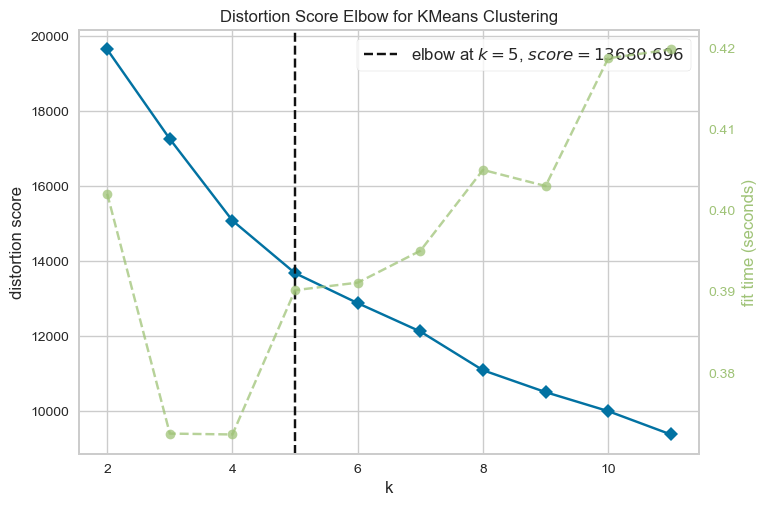

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model_cluster = KMeans(n_clusters=12, random_state=60, max_iter=1000)  # Defina a semente aleatória no modelo KMeans
visualizer = KElbowVisualizer(model_cluster, k=(2, 12), random_state=60)  # Defina a semente aleatória no KElbowVisualizer
visualizer.fit(X_transform)
visualizer.show()

In [14]:
# Criar e ajustar o modelo KMeans com o número ideal de clusters
model_cluster = KMeans(n_clusters=visualizer.elbow_value_, random_state=65)
model_cluster.fit(X_transform)
cluster_labels = model_cluster.predict(X_transform)

c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Adicionar os rótulos dos clusters ao DataFrame
X_transform['cluster_name'] = cluster_labels
print (X_transform['cluster_name'])

0       3
1       1
2       1
3       3
4       3
       ..
9139    0
9140    0
9141    0
9142    0
9143    4
Name: cluster_name, Length: 9144, dtype: int32


In [16]:
# Estatísticas descritivas para cada cluster
summary = X_transform.groupby(['cluster_name']).mean()
print(summary)

              ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  ENEMMATEMATICA  \
cluster_name                                                             
0                  0.715538     0.718933      0.699370        0.690615   
1                  0.731193     0.712191      0.682055        0.643639   
2                  0.697112     0.711474      0.664644        0.636279   
3                  0.740023     0.736733      0.719090        0.713637   
4                  0.707691     0.690379      0.663136        0.620786   

              ENEMREDACAO  ANOINGRESSO     IDADE  \
cluster_name                                       
0                0.642989     0.568535  0.146491   
1                0.719565     0.609528  0.134018   
2                0.658246     0.806505  0.156419   
3                0.693328     0.566905  0.153942   
4                0.665842     0.574525  0.125615   

              Grupo_criterio_Ampla Concorrência  \
cluster_name                                      
0             

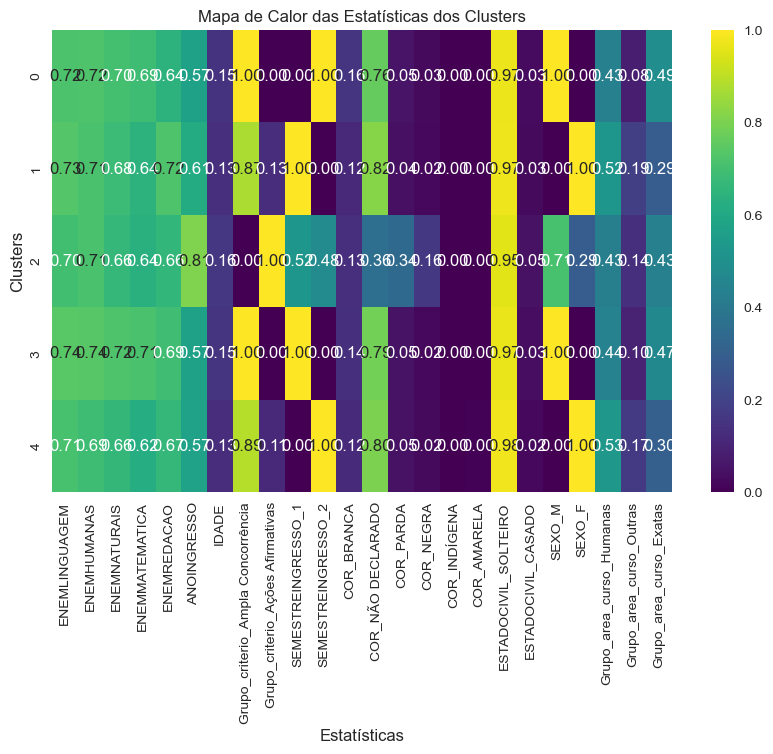

In [17]:
# Criar um mapa de calor das estatísticas dos clusters
plt.figure(figsize=(10, 6))
sns.heatmap(summary, annot=True, cmap='viridis', fmt=".2f")
plt.xlabel('Estatísticas')
plt.ylabel('Clusters')
plt.title('Mapa de Calor das Estatísticas dos Clusters')
plt.show()

In [18]:
# Calcular o Silhouette Score para os clusters
silhouette_avg = silhouette_score(X_transform.drop('cluster_name', axis=1), cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.24137646682317843


Vamos utilizar agora o features_importance do DecisionTreeClassifier para entender quais features foram mais importantes pro modelo. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [19]:
np.random.seed(60)
clf = tree.DecisionTreeClassifier(random_state=60) #algoritmo de arvore
clf.fit(X_transform[X_transform.columns.tolist()[:-1]], X_transform['cluster_name']) # fit arvore
features_importance = pd.Series(clf.feature_importances_, index=X_transform.columns.tolist()[:-1]) #pega a importancia das variaveis
features_importance = features_importance.sort_values(ascending=False) #ordena
print(features_importance)

SEMESTREINGRESSO_1                   0.226067
SEXO_M                               0.225173
SEMESTREINGRESSO_2                   0.208422
Grupo_criterio_Ampla Concorrência    0.145660
Grupo_criterio_Ações Afirmativas     0.133514
COR_NÃO DECLARADO                    0.061163
COR_NEGRA                            0.000000
Grupo_area_curso_Outras              0.000000
Grupo_area_curso_Humanas             0.000000
SEXO_F                               0.000000
ESTADOCIVIL_CASADO                   0.000000
ESTADOCIVIL_SOLTEIRO                 0.000000
COR_AMARELA                          0.000000
COR_INDÍGENA                         0.000000
ENEMLINGUAGEM                        0.000000
COR_PARDA                            0.000000
ENEMHUMANAS                          0.000000
COR_BRANCA                           0.000000
IDADE                                0.000000
ANOINGRESSO                          0.000000
ENEMREDACAO                          0.000000
ENEMMATEMATICA                    

In [20]:
# Substitua 'features_selecionadas' pelas features mais importantes que você deseja usar
# Defina um limite de importância
limite_importancia = 0.01

# Selecione as características com importância acima do limite
features_selecionadas = features_importance[features_importance >= limite_importancia].index.tolist()

# Crie um novo DataFrame com as features selecionadas
X_selected_features = X_transform[features_selecionadas]
X_selected_features

,SEMESTREINGRESSO_1,SEXO_M,SEMESTREINGRESSO_2,Grupo_criterio_Ampla Concorrência,Grupo_criterio_Ações Afirmativas,COR_NÃO DECLARADO
0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
9139,0.0,1.0,1.0,1.0,0.0,1.0
9140,0.0,1.0,1.0,1.0,0.0,1.0
9141,0.0,1.0,1.0,1.0,0.0,1.0
9142,0.0,1.0,1.0,1.0,0.0,1.0


In [21]:
model_cluster.fit(X_selected_features)
cluster_labels_selected = model_cluster.predict(X_selected_features)

c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
X_selected_features['cluster_name_selected'] = cluster_labels_selected
X_selected_features.columns

C:\Users\Mariana Moledo\AppData\Local\Temp\ipykernel_2280\3090203391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_features['cluster_name_selected'] = cluster_labels_selected


Index(['SEMESTREINGRESSO_1', 'SEXO_M', 'SEMESTREINGRESSO_2',
       'Grupo_criterio_Ampla Concorrência', 'Grupo_criterio_Ações Afirmativas',
       'COR_NÃO DECLARADO', 'cluster_name_selected'],
      dtype='object')

In [24]:
# Visualize ou analise os resultados da clusterização
print(X_selected_features['cluster_name_selected'].value_counts())

0    3296
1    2100
4    1774
2    1061
3     913
Name: cluster_name_selected, dtype: int64


In [25]:
# Estatísticas descritivas para cada cluster
summary_selected = X_selected_features.groupby(['cluster_name_selected']).mean()
print(summary_selected)

                       SEMESTREINGRESSO_1    SEXO_M  SEMESTREINGRESSO_2  \
cluster_name_selected                                                     
0                                     0.0  0.546723                 1.0   
1                                     1.0  1.000000                 0.0   
2                                     1.0  0.526861                 0.0   
3                                     0.0  0.571742                 1.0   
4                                     1.0  0.000000                 0.0   

                       Grupo_criterio_Ampla Concorrência  \
cluster_name_selected                                      
0                                                    1.0   
1                                                    1.0   
2                                                    0.0   
3                                                    0.0   
4                                                    1.0   

                       Grupo_criterio_Ações Afirmativ

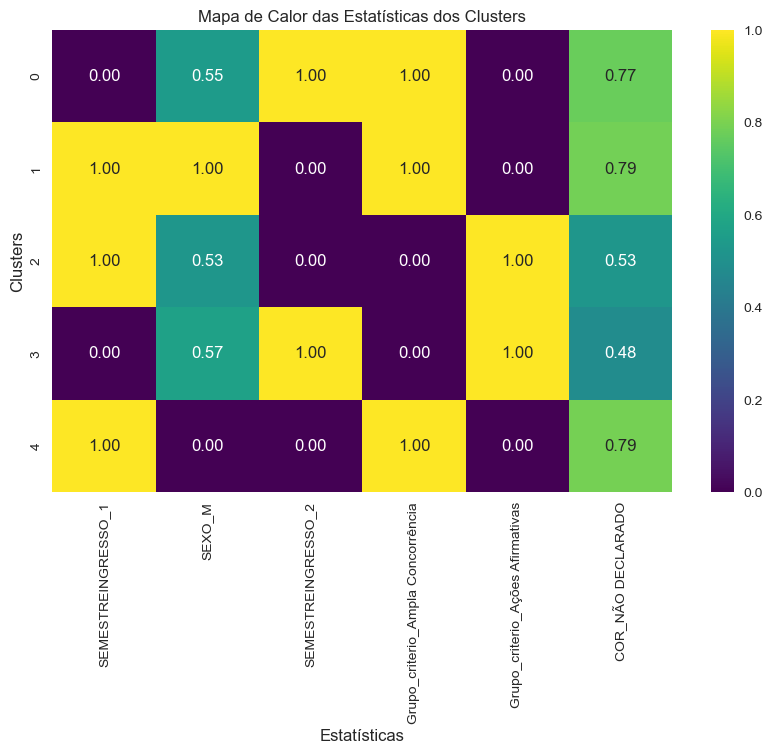

In [26]:
# Criar um mapa de calor das estatísticas dos clusters
plt.figure(figsize=(10, 6))
sns.heatmap(summary_selected, annot=True, cmap='viridis', fmt=".2f")
plt.xlabel('Estatísticas')
plt.ylabel('Clusters')
plt.title('Mapa de Calor das Estatísticas dos Clusters')
plt.show()

In [27]:
# Calcular o Silhouette Score para os clusters
silhouette_avg = silhouette_score(X_selected_features.drop('cluster_name_selected', axis=1), cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5669835402835833


[Text(0.5909090909090909, 0.875, 'SEMESTREINGRESSO_2 <= 0.5\ngini = 0.756\nsamples = 9144\nvalue = [3296, 2100, 1061, 913, 1774]'),
 Text(0.36363636363636365, 0.625, 'SEXO_M <= 0.5\ngini = 0.643\nsamples = 4935\nvalue = [0, 2100, 1061, 0, 1774]'),
 Text(0.18181818181818182, 0.375, 'Grupo_criterio_Ações Afirmativas <= 0.5\ngini = 0.344\nsamples = 2276\nvalue = [0, 0, 502, 0, 1774]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.0\nsamples = 1774\nvalue = [0, 0, 0, 0, 1774]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 502\nvalue = [0, 0, 502, 0, 0]'),
 Text(0.5454545454545454, 0.375, 'Grupo_criterio_Ampla Concorrência <= 0.5\ngini = 0.332\nsamples = 2659\nvalue = [0, 2100, 559, 0, 0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 559\nvalue = [0, 0, 559, 0, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 2100\nvalue = [0, 2100, 0, 0, 0]'),
 Text(0.8181818181818182, 0.625, 'Grupo_criterio_Ações Afirmativas <= 0.5\ngini = 0.34\nsamples = 4209\nvalue 

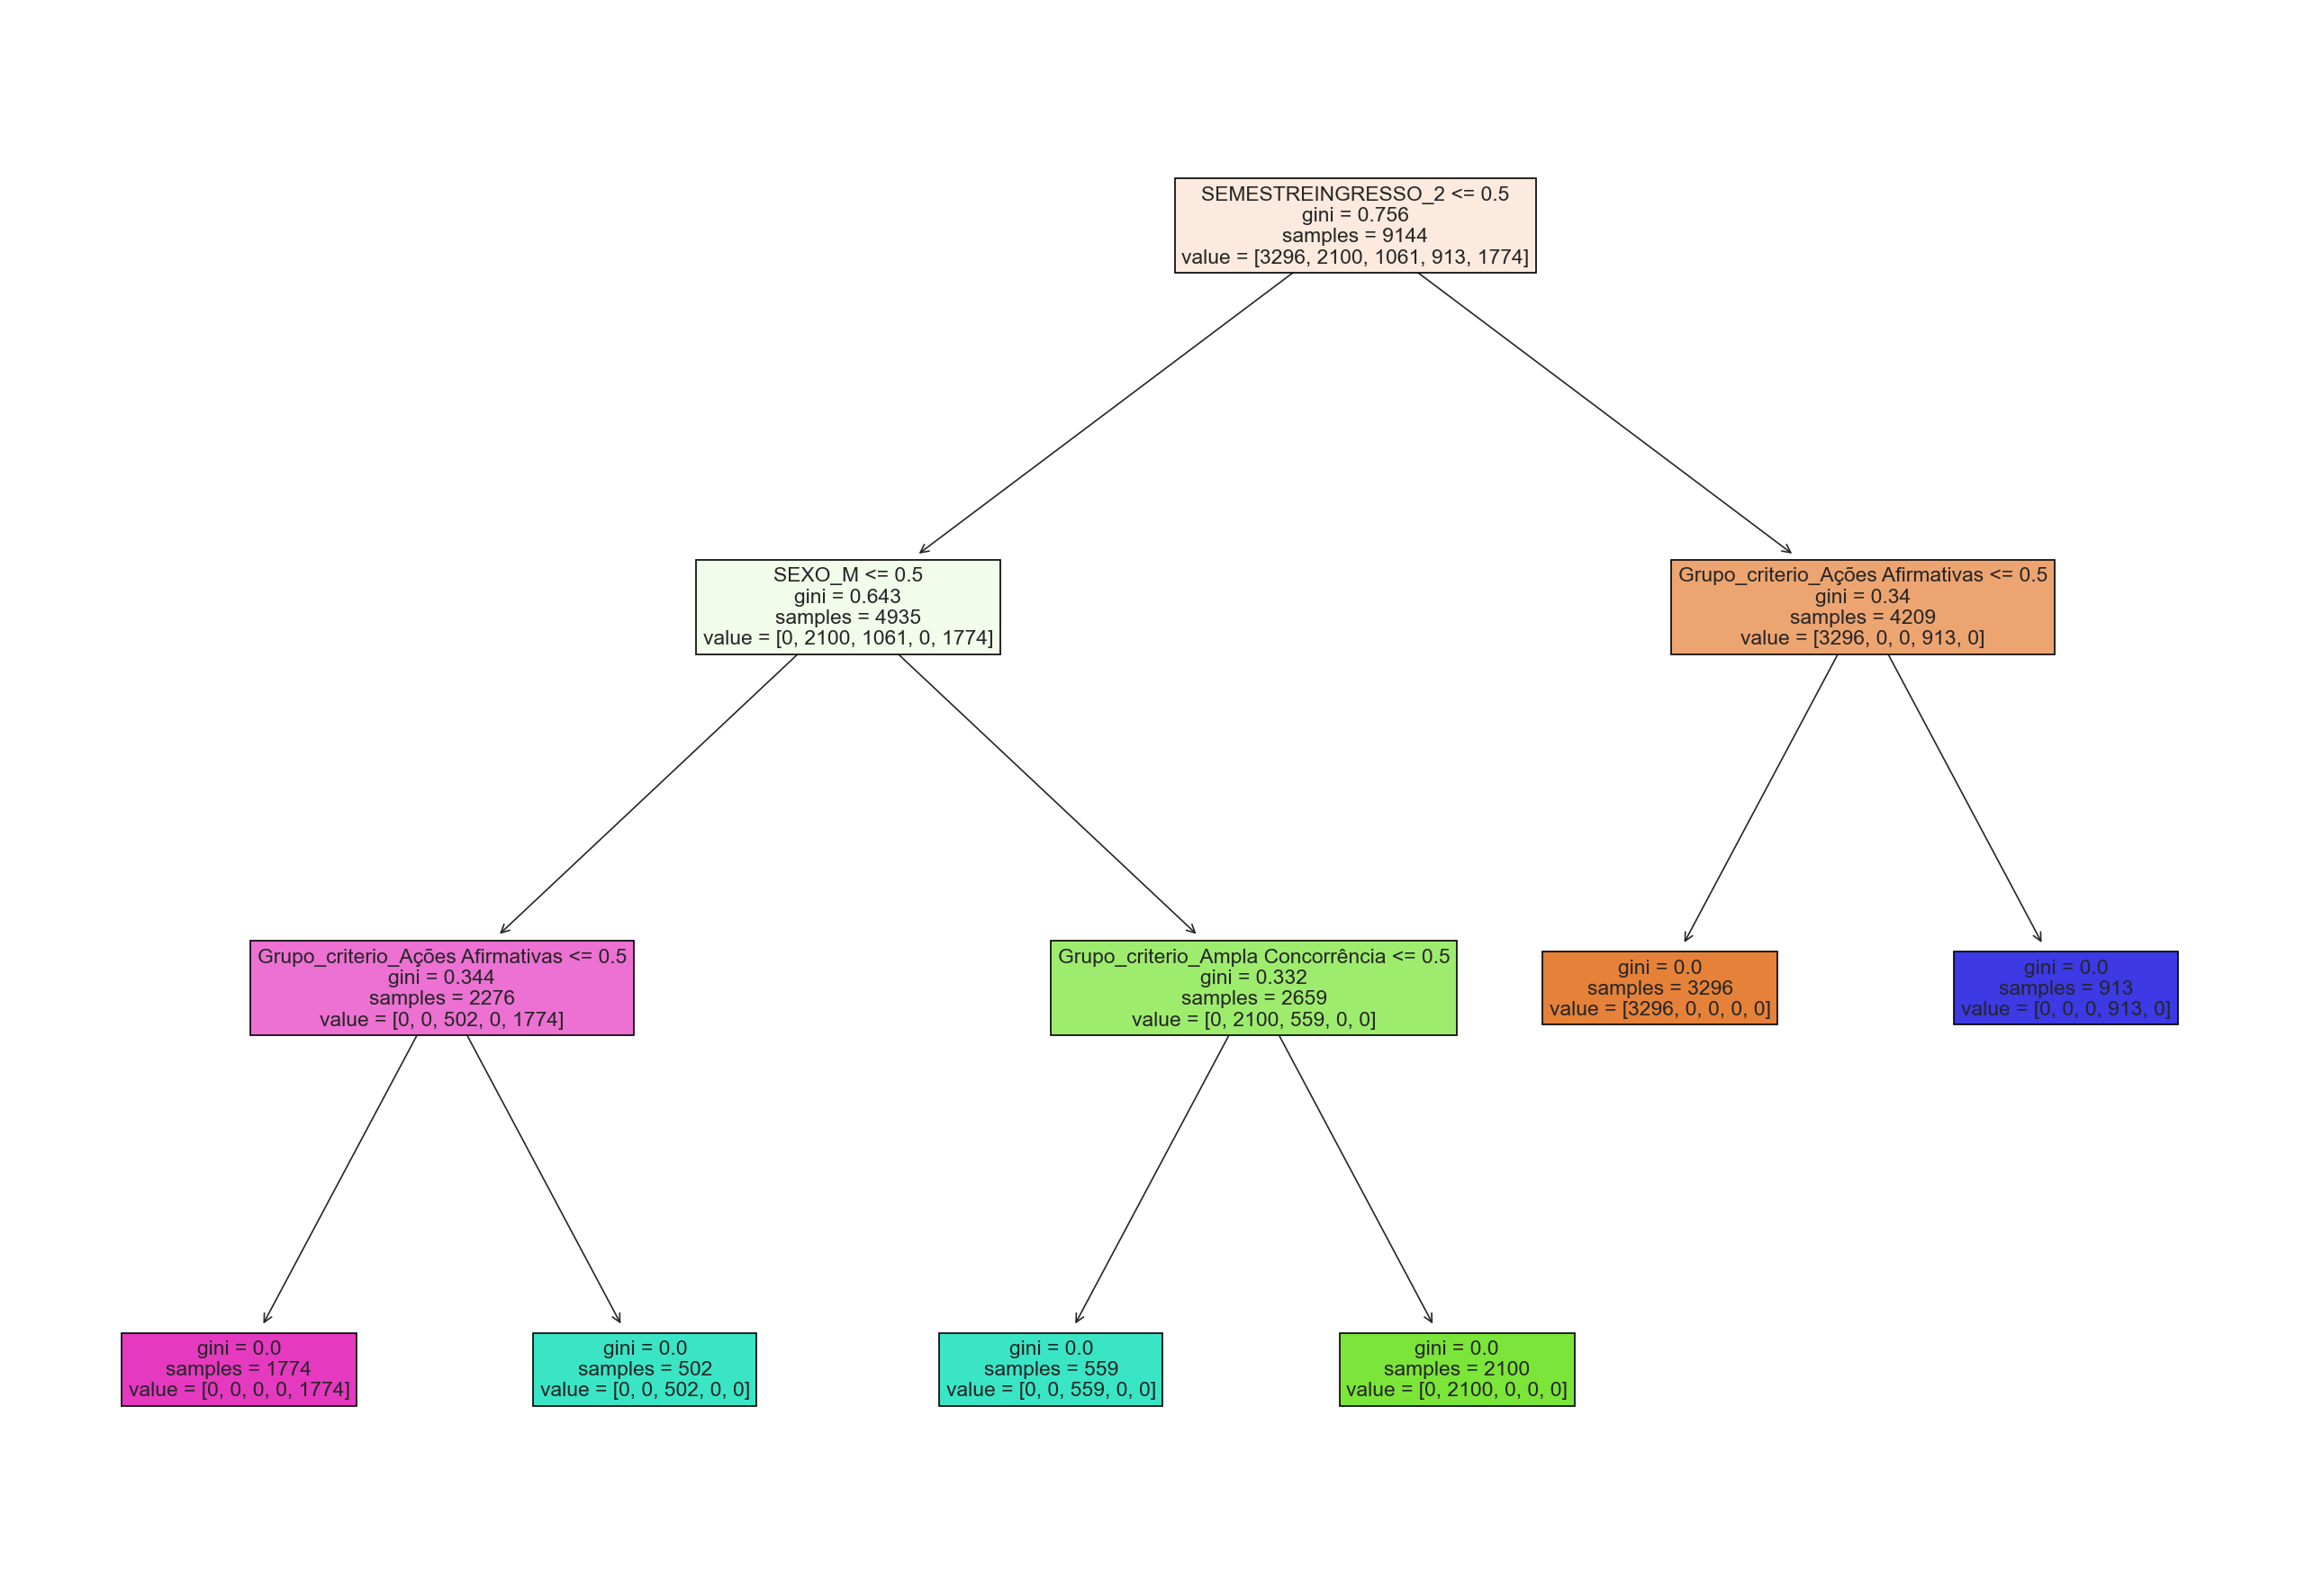

In [28]:
X_selected_features
features = X_selected_features.columns.tolist()[:-1]
features

target = 'cluster_name_selected'
clf = tree.DecisionTreeClassifier()

clf.fit(X_selected_features[features], X_selected_features[target])
plt.figure(dpi=400)
tree.plot_tree(clf,feature_names=features,  
                filled=True)